## BME i9400
## Fall 2024
### Multilayer Perceptrons (MLPs)


<img src="dnn.png" alt="ANN Diagram" width="600"/>

## Single-Layer Perceptron
- A perceptron is building block of artificial neural networks (will be defined later in the lecture)
- Given a vector of inputs (x) and weights (w), the perceptron computes the weighted sum of the inputs:
---
$y = u \left( \sum_{i=1}^{n} w_i x_i + b \right)$ 

---

where $u$ is the step function:

---
$u(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{otherwise} \end{cases}$

---  
$w_i$ are the weights, $x_i$ are the inputs, and $b$ is the bias term.


## Activation Functions
- The activation function in the perceptron above is the step function.
- In practice, we use other activation functions such as the sigmoid or tanh functions.
    - Sigmoid: $\sigma(z) = \frac{1}{1 + e^{-z}}$
    - Tanh: $\mathrm{tanh}(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
- When the sigmoid is used, the single layer perceptron is simply a logistic regression model.
- The activation function introduces non-linearity to the model.
- The non-linearity allows the model to learn complex patterns in the data.

## The Rectified Linear Unit (ReLU)
- The rectified linear unit (ReLU) is another popular activation function.
- The ReLU function is defined as:
---

$\mathrm{ReLU}(z) = \begin{cases} z & \text{if } z \geq 0 \\ 0 & \text{otherwise} \end{cases}$

---
- Notice that if the input into the function is positive, the ReLU function returns the input value, otherwise it returns zero.
- The gradient of the ReLU activation function is thus very easy to compute.

## Let's plot the sigmoid, tanh, and ReLU functions

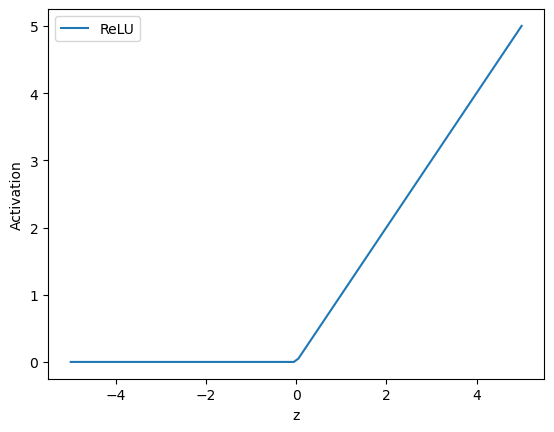

In [3]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 100)
sigmoid = 1 / (1 + np.exp(-z))
tanh = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
relu = np.maximum(0, z)

plt.plot(z, sigmoid, label='Sigmoid')
plt.plot(z, tanh, label='Tanh')
plt.plot(z, relu, label='ReLU')
plt.xlabel('z')
plt.ylabel('Activation')
plt.legend()
plt.show()

## A perceptron with multiple output units
- A perceptron can have multiple output units.
- In this case, the weights are represented as a matrix.
---
$y = u \left( W x + b \right)$

---
- where $W$ is a matrix of weights, $x$ is the vector of inputs (features), and $b$ is a vector of biases.
- Note that the bias term is applied *element-wise* to each output unit.
- Note also that the output is now a vector of values, one for each output unit.

## Let's implement a perceptron with multiple output units

In [4]:
import numpy as np

# input vector
x = np.array([1, 2, 3])

# weight matrix containing the weights for 2 output units
W = np.array([[.1, .2, .3], [.4, .5, .6]])

# the bias term for each output unit
b = np.array([2, -2])

# Let's use the sigmoidal nonlinearity
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
# compute the weighted sum of inputs
z = np.dot(W, x) + b 

# apply the activation function (non-linearity) element-wise
y = sigmoid(z) 

print(y)

[0.96770454 0.76852478]


## Hidden Layers
- We now know how to implement a single-layer perceptron with multiple output units
- The last ingredient that we need to build a multilayer perceptron is the **hidden layer**
- A hidden layer resides between the inputs and outputs, and is tasked with learning intermediate features that help to map a given input to the correct output.
- The *first* hidden layer is composed of a set of $m$ hidden units, each of which is a perceptron.
---

<center> hidden unit 1: $h_1 = u \left( \sum_{i=1}^{n} w_{1i} x_i + b_1 \right)$ </center>

<center> hidden unit 2: $h_2 = u \left( \sum_{i=1}^{n} w_{2i} x_i + b_2 \right)$ </center>

<center> ... </center>

<center> hidden unit m: $h_m = u \left( \sum_{i=1}^{n} w_{mi} x_i + b_m \right)$ </center>

---
- where $w_{ji}$ are the weights, $x_i$ are the inputs, and $b_j$ is the bias term for hidden unit $j$.
- Collectively, the hidden units may be assembled into an $m$-dimensional vector $h$:
---
<center> $h = u \left( W x + b \right)$ </center>

---



## Additional Hidden Layers
- We see above that the first hidden layer is essentially a perceptron from the inputs.
- Importantly, we can have multiple hidden layers.
- For example, the second hidden layer is connected to the output of the first hidden layer:
---
$h_2 = u(W_2 h_1 + b_2)$

---
- and the third hidden layer is connected to the output of the second hidden layer:

---
$h_3 = u(W_3 h_2 + b_3)$

---
- The number of elements ("units") in each hidden layer is a hyperparameter that can be tuned.
- The number of units in each hidden layer is not necessarily the same.

## The output layer is connected to the last hidden layer.
- Assuming that we have 3 hidden layers, the output layer is given by:
---
$y = u(W_o h_3 + b_o)$

---
- It is commonplace to use a softmax activation function in the output layer. ($u$ is the softmax function)
- In this case, the value of each unit in the output layer represents a probability.
    - For example, for a binary classification problem, the output layer will have two units, one for each class.
    - The value of the first unit is the probability that the input belongs to class 0, and the value of the second unit is the probability that the input belongs to class 1.

## Artificial Neural Networks
- A multilayer perceptron with multiple hidden layers is called an artificial neural network (ANN).
- ANNs are loosely inspired by biological neural networks.
- Below is the canonical structure of an ANN (in this case with two hidden layers):
- 
[Artificial Neural Network](dnn.png)
- The "deep" in deep learning refers to the number of hidden layers in the network.
- As we will see later in the course, it has been empirically shown that adding layers to a neural network can improve its performance more so than adding units to each layer. 

## Training Artificial Neural Networks
- Training an artificial neural network involves adjusting the weights and biases of the network to minimize a loss function.
- We have already seen the loss functions used to train ANNs: cross-entropy loss for classification and mean squared error for regression.
- The weights of all of the layers are assembled into one large vector, and the biases are assembled into another vector.
- The loss function is a function of the weights and biases.
- Stochastic gradient descent is then used to find the values of all the weights and all the biases that minimize the loss function.

## Backpropagation Algorithm
- The algorithm that actually implements stochastic gradient descent in ANNs is called "backpropagation"
- The job of the backpropagation algorithm is to compute the gradients of the loss function with respect to the weights and biases.
- Strictly speaking, we only need to implement the chain rule in order to compute these gradients.
- However, the backpropagation algorithm is a clever way to compute these gradients efficiently.

## What is PyTorch?
- PyTorch is an open-source machine learning library developed by Facebook.
- PyTorch provides a flexible and dynamic computational graph that allows for easy experimentation.
- It is widely used in academia and industry for research and production.
- PyTorch is used for building neural networks and other machine learning models.

## PyTorch Tensors
- PyTorch provides a powerful N-dimensional array object called a tensor.
- Tensors are similar to NumPy arrays, but with additional features.
- Tensors can be used on CPUs and GPUs.
- Tensors support automatic differentiation for building neural networks.
- Tensors can be created from Python lists, NumPy arrays, and other data types.
- Tensors can be manipulated using a wide range of operations and functions.

## Creating Tensors
- We can create tensors in PyTorch using the `torch.tensor` function.


In [ ]:
import numpy as np
import torch

# Create a tensor from a list
x = torch.tensor([1, 2, 3])
print(x)

# Create a tensor from a NumPy array
x = torch.tensor(np.array([4, 5, 6]))
print(x)


In [ ]:
# demonstrate tensor operations
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
z = x + y
print(z)


In [16]:
# create a random 3 by 3 tensor
x = torch.randn(3, 3)
y = torch.randn(3, 1)
x @ y

tensor([[-0.2654],
        [ 2.0187],
        [-1.2591]])

## Implementing a Neural Network in PyTorch
- The following code implements a simple feedfoward neural network a specified number of hidden layers in PyTorch
- We first need to import the necessary libraries

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import make_classification
import numpy as np

## Dataset
- We will use a synthetic dataset generated using the `make_classification` function from scikit-learn.
- The dataset has 10000 samples, 20 features, and 2 classes.
- Below we will convert the dataset into PyTorch tensors and split it into training and validation sets.


In [20]:
# Generate a sample dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X = X.astype(np.float32)  # Convert to float32 for PyTorch
y = y.astype(np.longlong)  # Convert to long for classification
X.shape, y.shape

((10000, 20), (10000,))

In [21]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)
X_tensor.shape, y_tensor.shape

(torch.Size([10000, 20]), torch.Size([10000]))

## PyTorch Datasets
- PyTorch provides the `TensorDataset` class to create a dataset from tensors ("X" and "y").
- We can use the `random_split` function to split the dataset into training and validation sets.

In [29]:
# Create a PyTorch dataset
dataset = TensorDataset(X_tensor, y_tensor)

In [30]:
# Split dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset), len(val_dataset)

(8000, 2000)

## Data Loaders
- PyTorch provides the `DataLoader` class to create loaders from datasets.
- These loaders are used to bring in the data in *batches* during training and evaluation.
- The batch size specifies the number of samples to be used in each iteration -- this is the number of examples that is used to compute gradients and update the model parameters.
- In modern-day machine learning, we rarely use the entire dataset at once due to memory constraints (datasets are often very large).

In [31]:
# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [35]:
train_loader.dataset, val_loader.dataset

(<torch.utils.data.dataset.Subset at 0x1160d5940>,
 <torch.utils.data.dataset.Subset at 0x1160d9c40>)

## Defining a Multilayer Perceptron (MLP) in PyTorch
- PyTorch provides the `nn.Module` class to create neural network models.
- In this class, the user specifies the operations that the model should perform in order to map the input feature to the output of the network.
- Below we define a simple MLP with a specified number of hidden layers.
- The building block of the MLP is the `nn.Linear` class, which represents a linear transformation of the input data.
    - This is essentially just a matrix multiplication followed by a bias term.

In [ ]:
# Define a simple Multilayer Perceptron (MLP) class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers) # the star operator unpacks the list

    def forward(self, x): # the forward method is required and specifies how the model maps inputs to outputs
        return self.model(x) 

In [3]:
import torch
my_linear = torch.nn.Linear(10, 5)
sample_input = torch.randn(10)
my_linear(sample_input)

tensor([ 1.1238,  0.7192, -0.3244,  0.0961, -0.4307], grad_fn=<ViewBackward0>)

## Instantiating the model
- So far we've define the model structure, but haven't yet created an *instance* of the model.
- We can do this by simply calling the class with the appropriate arguments.
    - These are the number of features in our input, the number of neurons in each hidden layer, and the number of output classes.
- Our model will have a 20-dimensional input layer, two hidden layers with 64 and 32 units each, and a 2-dimensional output layer.

In [ ]:
# Instantiate the MLP with 2 hidden layers
input_size = X.shape[1]  # 20 features
hidden_sizes = [64, 32]  # Two hidden layers with 64 and 32 neurons
output_size = 2  # Binary classification (2 classes)

mlp = MLP(input_size, hidden_sizes, output_size)
print(mlp) # print out our model specs

## Defining the loss function and optimizer
- We need to tell PyTorch how to train the model.
- This consists of specifying the loss function (here will be the cross-entropy loss), and the optimizer (here we will use the "Adam" optimizer).
    - The Adam optimizer is just a more fancy way of performing stochastic gradient descent.

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

## Training the model
- It is standard practice to define a function that performs model training.
- This function will:
    - loop over the training data for a prescribed number of *epochs* (i.e., 10)
    - compute the loss
    - compute the gradients
    - update the model parameters.

In [ ]:
# Training function
def train(model, loader, criterion, optimizer, epochs=30):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in loader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels) # compute the loss
            
            # Backward pass and optimize
            loss.backward() # compute the gradients
            optimizer.step() # update the model parameters using the gradients
            
            running_loss += loss.item() # keep track of the loss
        
        avg_loss = running_loss / len(loader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


In [ ]:
# Here we actually perform the training by calling our 'train' function
train(mlp, train_loader, criterion, optimizer, epochs=10)

## Defining a validation function
- We can define a function to evaluate the model on the *validation* set.
- The validation set is similar to a test set, but is often used to tune the model hyperparameters.
- Importantly, the validation loop does not update the model parameters, but simply calls the model to make predictions so that we can measure model performance.

In [ ]:
# Validation function
def validate(model, loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            # Get predicted class
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = val_loss / len(loader)
    accuracy = 100 * correct / total
    print(f"Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


In [ ]:
# Evaluate the model on the validation set
validate(mlp, val_loader, criterion)

### How did our model do?